#### https://online.stat.psu.edu/stat501/lesson/12

In [1]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats
filedir = 'STAT501_Lesson12'
os.listdir(filedir)

['allentest.txt',
 '.DS_Store',
 'uncorrelated.txt',
 'correlated_result.png',
 'allentestn23.txt',
 'uncorrelated_result.png',
 'bloodpress.txt',
 'uncorrpreds.txt',
 'exerimmun.txt',
 'cement.txt',
 'poverty.txt']

#### 1. What is Multicollinearity

If $x_3$ and $x_6$ are uncorrelated

In [2]:
Image(url=os.path.join(filedir, "uncorrelated_result.png"), width=600, height=600)

If $x_2$ and $x_3$ are high correlated

In [3]:
Image(url=os.path.join(filedir, "correlated_result.png"), width=600, height=600)

We can no longer make much sense of the usual interpretation of a slope coefficient as the change in y with change in $x_k$, **holding all the other predictors constant**.

slopes vary a lot; hypothesis tests can give different conclusions; marginal contribution is smaller; standard errors are large

#### 2. Detecting Multicollinearity Using Variance Inflation Factors

<ol>
    <li>Estimates of slopes vary from model to model</li>
    <li>The t-tests are non-significant, while F value is large enough</li>
    <li>The correlations among Xs are large</li>
    <li><b>Variance Inflation Factors (VIF)</b>: pairwise correlation is limiting; a linear dependence exists among three or more variables, for example $X_3 = 2 X_1 + 5 X_2 + error$</li>
</ol>

In [4]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats
filedir = 'STAT501_Lesson12'
os.listdir(filedir)

['allentest.txt',
 '.DS_Store',
 'uncorrelated.txt',
 'correlated_result.png',
 'allentestn23.txt',
 'uncorrelated_result.png',
 'bloodpress.txt',
 'uncorrpreds.txt',
 'exerimmun.txt',
 'cement.txt',
 'poverty.txt']

In [5]:
df = pd.read_table(os.path.join(filedir, 'bloodpress.txt'))
df

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,1,105,47,85.4,1.75,5.1,63,33
1,2,115,49,94.2,2.10,3.8,70,14
2,3,116,49,95.3,1.98,8.2,72,10
3,4,117,50,94.7,2.01,5.8,73,99
4,5,112,51,89.4,1.89,7.0,72,95
5,6,121,48,99.5,2.25,9.3,71,10
6,7,121,49,99.8,2.25,2.5,69,42
7,8,110,47,90.9,1.90,6.2,66,8
8,9,110,49,89.2,1.83,7.1,69,62
9,10,114,48,92.7,2.07,5.6,64,35


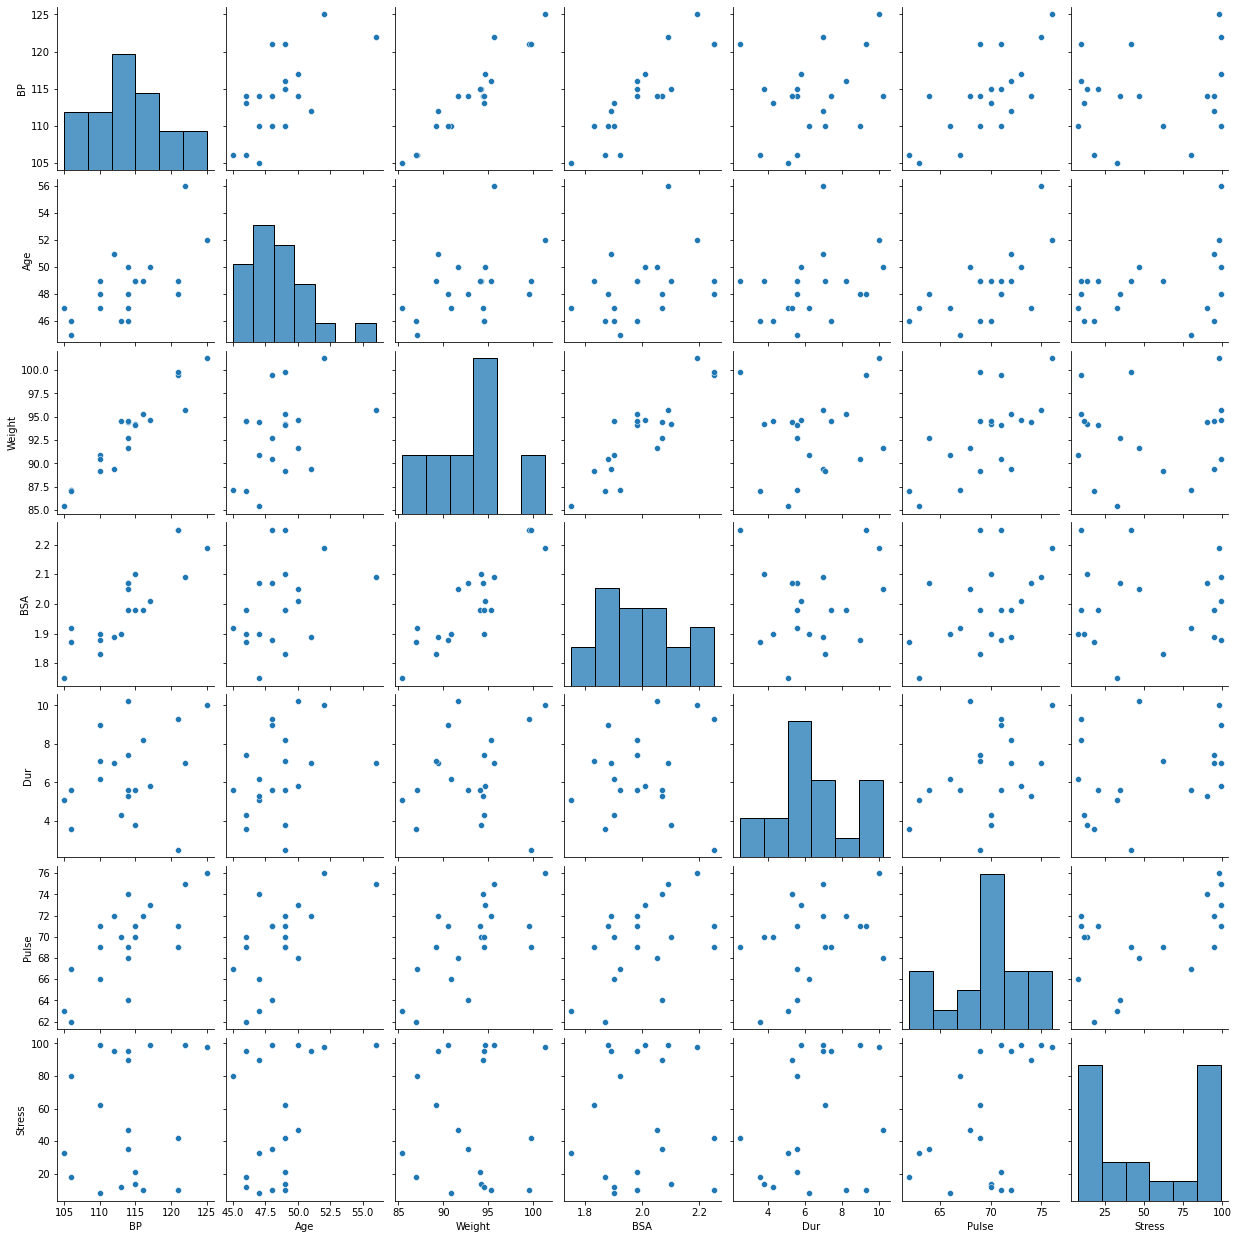

In [6]:
sns.pairplot(df.iloc[:,1:])

In [7]:
y = df['BP']
X = df[['Age','Weight','BSA','Dur','Pulse','Stress']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     560.6
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           6.40e-15
Time:                        15:20:37   Log-Likelihood:                -6.1033
No. Observations:                  20   AIC:                             26.21
Df Residuals:                      13   BIC:                             33.18
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8705      2.557     -5.034      0.000     -18.394      -7.347
Age            0.7033      0.050     14.177      0.000       0.596       0.810
Weight         0.9699      0.063     15.369      0.000       0.834       1.106
BSA            3.7765      1.580      2.390      0.033       0.363       7.190
Dur            0.0684      0.048      1.412      0.182      -0.036       0.173
Pulse         -0.0845      0.052     -1.637      0.126      -0.196       0.027
Stress         0.0056      0.003      1.633      0.126      -0.002       0.013
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.643
Skew:                          -1.050   Prob(JB):                       0.0981
Kurtosis:                       4.076   Cond. No.                     4.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
vif_list = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
pd.DataFrame({
    'feature':X.columns,
    'VIF':vif_list
})

,feature,VIF
0,const,788.307692
1,Age,1.762807
2,Weight,8.417035
3,BSA,5.328751
4,Dur,1.237309
5,Pulse,4.413575
6,Stress,1.834845


The empirical rule is VIF > 5

#### What is Variance Inflation Factor?

In [10]:
y = df['Weight']
X = df[['Age','BSA','Dur','Pulse','Stress']]
X['const'] = 1

/var/folders/6p/9bzctf_57kx_d_37w01kwznh0000gn/T/ipykernel_16090/2478458847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1


In [11]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     20.77
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           5.05e-06
Time:                        15:20:37   Log-Likelihood:                -35.712
No. Observations:                  20   AIC:                             83.42
Df Residuals:                      14   BIC:                             89.40
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.1446      0.206     -0.700      0.495      -0.588       0.298
BSA           21.4217      3.465      6.183      0.000      13.991      28.852
Dur            0.0087      0.205      0.042      0.967      -0.431       0.449
Pulse          0.5577      0.160      3.489      0.004       0.215       0.901
Stress        -0.0230      0.013     -1.758      0.101      -0.051       0.005
const         19.6744      9.465      2.079      0.057      -0.625      39.974
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.445
Skew:                          -0.130   Prob(JB):                        0.800
Kurtosis:                       2.317   Cond. No.                     2.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$
VIF_i = \frac{1}{1-R_i^2}
$$

In [12]:
1 / (1-0.881)

8.403361344537815

Pairwise correlation is not sufficient because a linear dependence may exist among three or more variables. Therefore, we can regress "Weight" against other variables and get R2. If the R2 is big, it means "Weight" can be explained by other variables, and thus has multicollinearity. 

R2 is between 0 and 1; the linear relationship is not ideal to measure multicollinearity. For example, 0.4 R2 is half of 0.8 R2, but clearly 0.8 R2 is much more serious than twice of 0.4 R2

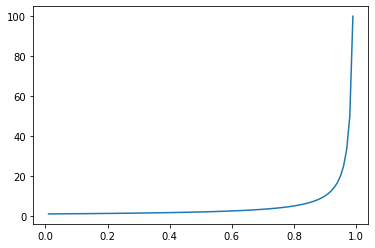

In [13]:
from matplotlib import pyplot as plt
X_arr = np.arange(0.01,1,0.01)
Y_arr = 1/(1-X_arr)
plt.plot(X_arr, Y_arr)

#### 3. Handle Data-based Multicollinearity

Data-based multicollinearity results from a poorly designed experiment, **reliance on purely observational data**, or the inability to manipulate the system on which the data are collected.

Of course you can remove one feature to reduce multicolinearity

Alternatively, collect more data! Usually we can see a weaker correlation with more data samples, if the additional data can enlarge the "base"

#### 4. Handle Structural Multicollinearity

For example, if we include $x^2$ as a predictor, it may have a strong correlation with $x$

In [14]:
df = pd.read_table(os.path.join(filedir, 'exerimmun.txt'))
df

,igg,oxygen
0,881,34.6
1,1290,45.0
2,2147,62.3
3,1909,58.9
4,1282,42.5
5,1530,44.3
6,2067,67.9
7,1982,58.5
8,1019,35.6
9,1651,49.6


In [15]:
df['oxygen2'] = np.power(df['oxygen'], 2)
df['const'] = 1

In [16]:
sm.OLS(df['igg'],df[['const','oxygen','oxygen2']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    igg   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     203.2
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           5.33e-17
Time:                        15:20:37   Log-Likelihood:                -181.01
No. Observations:                  30   AIC:                             368.0
Df Residuals:                      27   BIC:                             372.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1464.4042    411.401     -3.560      0.001   -2308.530    -620.279
oxygen        88.3071     16.474      5.361      0.000      54.506     122.108
oxygen2       -0.5362      0.158     -3.390      0.002      -0.861      -0.212
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.636
Skew:                           0.228   Prob(JB):                        0.728
Kurtosis:                       2.452   Cond. No.                     6.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X = df[['const','oxygen','oxygen2']]
vif_list = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [18]:
vif_list

[448.2833664859298, 99.94261307344864, 99.94261307344864]

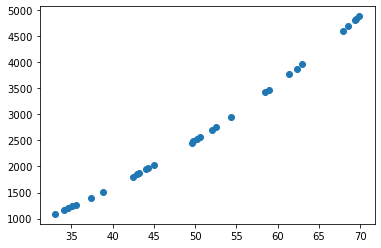

In [19]:
plt.scatter(df['oxygen'], df['oxygen2'])

It shows a linear relationship between oxygen and oxygen squared.

The solution is to "center the predictors"

In [20]:
oxygen_mean = df['oxygen'].mean()
df['oxygen_centered'] = df['oxygen'] - oxygen_mean
df['oxygen2_centered'] = np.power(df['oxygen_centered'], 2)

#### Result: R2 doesn't change, but VIF gets reduced, t increased

In [21]:
sm.OLS(df['igg'],df[['const','oxygen_centered','oxygen2_centered']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    igg   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     203.2
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           5.33e-17
Time:                        15:20:38   Log-Likelihood:                -181.01
No. Observations:                  30   AIC:                             368.0
Df Residuals:                      27   BIC:                             372.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1632.1962     29.349     55.614      0.000    1571.978    1692.415
oxygen_centered     33.9995      1.689     20.130      0.000      30.534      37.465
oxygen2_centered    -0.5362      0.158     -3.390      0.002      -0.861      -0.212
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.636
Skew:                           0.228   Prob(JB):                        0.728
Kurtosis:                       2.452   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = df[['const','oxygen_centered','oxygen2_centered']]
vif_list = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_list

[2.2813772871837084, 1.050627752640113, 1.050627752640113]